# <center>Polynomial Regression</center>

Similar to Linear Regression, Polynomial Regression is a supervised machine learning technique to model the relationship between a dependent variable and one or more independent variables. The main difference between Linear Regression and Polynomial Regression is that Polynomial Regression allows the model to be a non-linear function of the independent variable(s).

Suppose we are given data $(x_i, y_i); i = 1,...,n$ and we want to model the relationship between $y_i$ and $x_i$ using a polynomial function with degree m of the form:

$$y = \sum_{i=0}^m w_i x^i$$

We can find w that best fits the data by minimizing the Residual Square Error (RSS) similar to Multi-Linear Regression. The only difference here is the way we set up the X matrix.

$$min_{w}||(y - Xw)||^2$$

where $y = \begin{bmatrix}
y_1 \\
y_2 \\
... \\
y_n
\end{bmatrix}$, $X = \begin{bmatrix}
1 & x_1 & x_1^2 & ... & x_1^m \\
1 & x_2 & x_2^2 & ... & x_2^m \\
... & ... & ... & ... & ... \\
1 & x_n & x_n^2 & ... & x_n^m
\end{bmatrix}$, and $w = \begin{bmatrix}
w_0 \\
w_1 \\
... \\
w_m
\end{bmatrix}$




How do we choose the degree of the polynomial?

There is no obvious way to choose the degree of the polynomial. Depending on the data different degrees of the polynomial will result in different fits. The "best fit" is the one that minimizes Test and Training error.

Large m = More flexibile  
Small m = Less Flexible

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

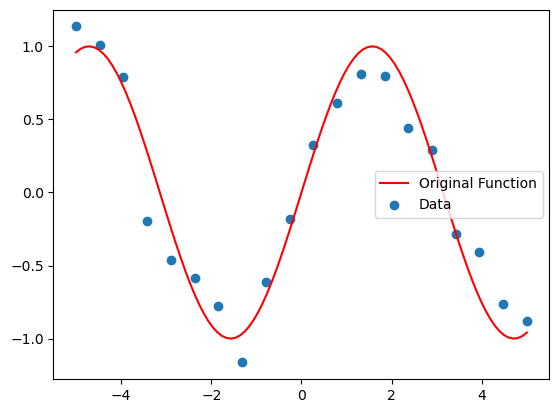

In [17]:
# Code to Generate Data with noise (Assume Noise is Gaussian with a mean of 0 and a variance of 0.2)
# Set seed for reproducibility
np.random.seed(20)
n = 20
x = np.linspace(-5, 5, n)
# y = np.polyval(np.array([1, -4, 3, 4]), x) + np.random.normal(0, 10, n)
y = np.sin(x) + np.random.normal(0, 0.2, n)

# Code to Plot the original function
xx = np.linspace(-5, 5, 100)
# yy = np.polyval(np.array([1, -4, 3, 4]), xx)
yy = np.sin(xx)
plt.plot(xx, yy, color='red')
plt.scatter(x, y)
plt.legend(['Original Function', 'Data'])
plt.show()


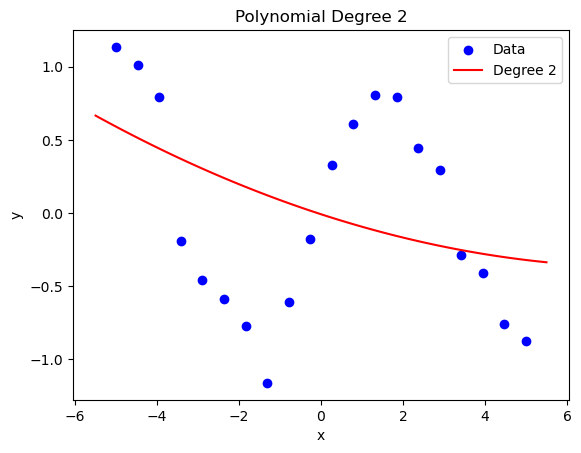

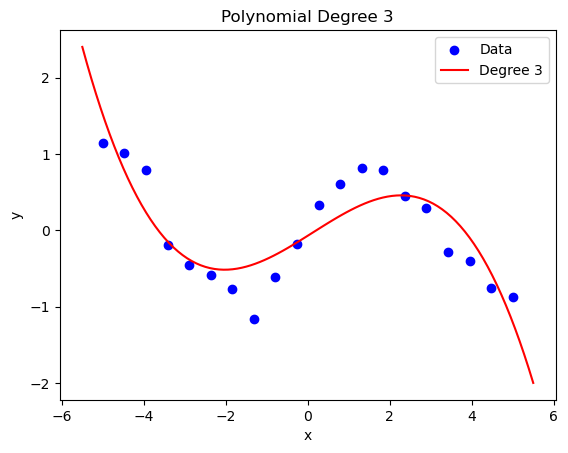

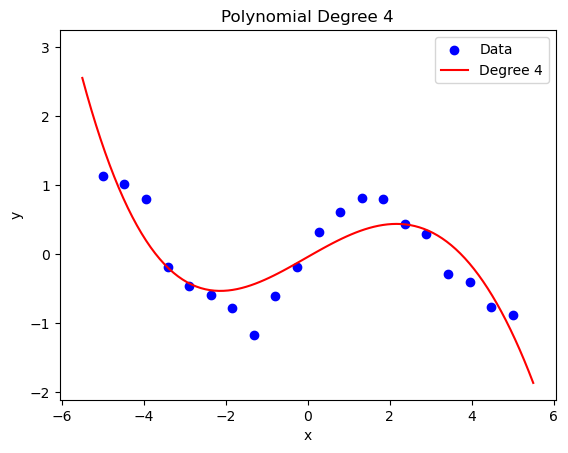

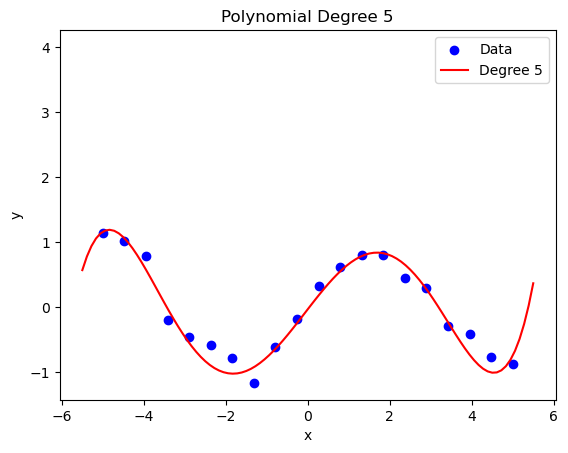

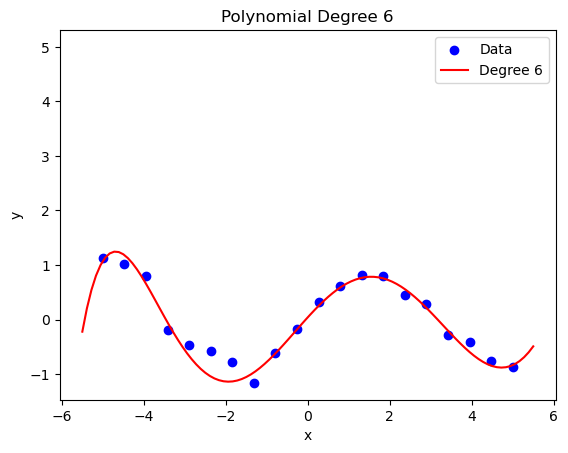

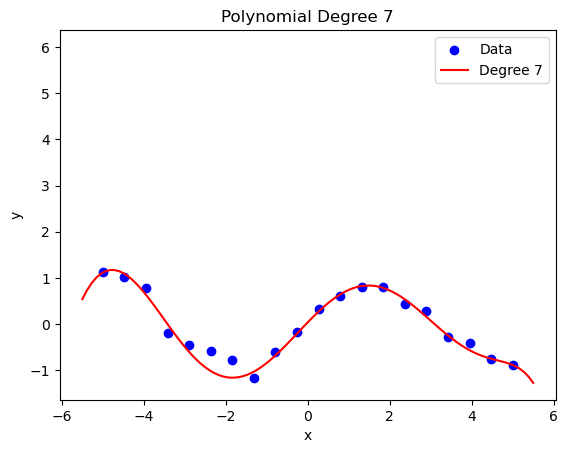

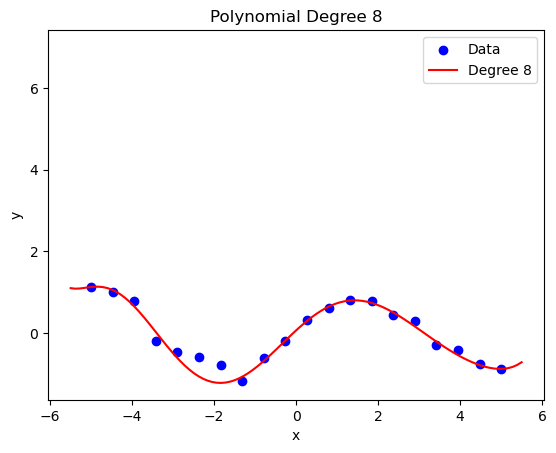

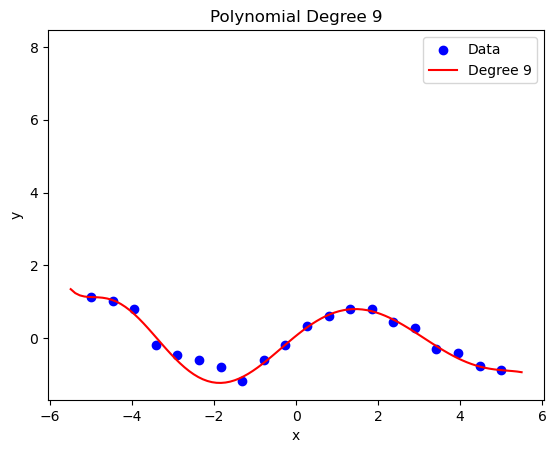

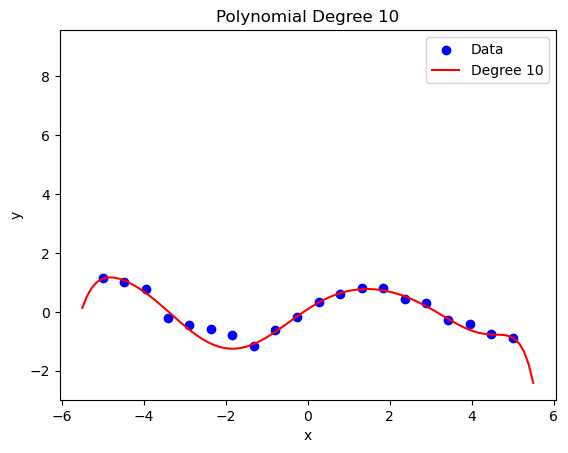

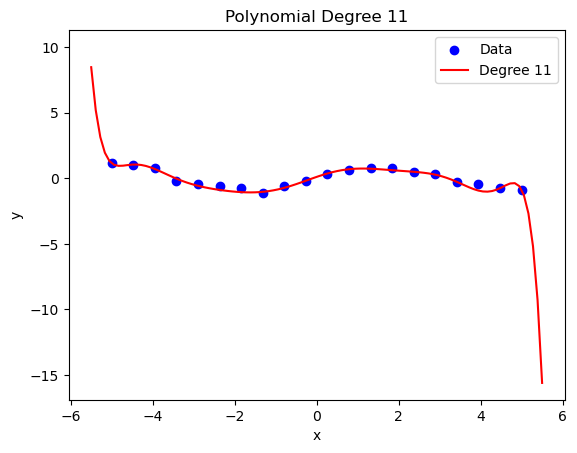

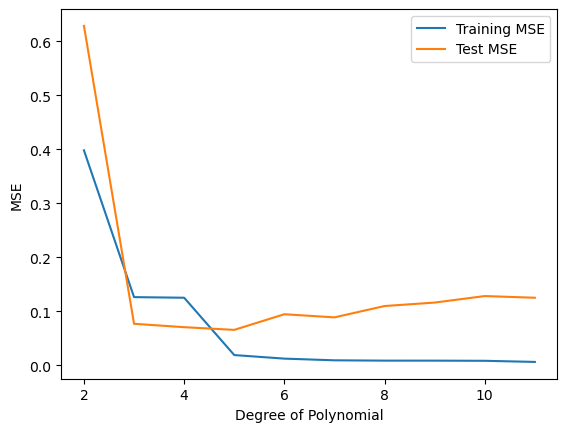

In [18]:
#Set up the X polynomial matrix
def polynomial_features(x, m):
    matrix = np.column_stack([x**i for i in range(1, m + 1)])
    return np.hstack((np.ones((matrix.shape[0],1)), matrix))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)


x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

train_mse = []
test_mse = []

for m in range(2, 12):
    x_train2 = polynomial_features(x_train, m)
    x_test2 = polynomial_features(x_test, m)

    res = np.linalg.lstsq(x_train2, y_train, rcond=None)
    w = res[0]
    train_mse.append(np.mean((y_train - x_train2.dot(w))**2))
    test_mse.append(np.mean((y_test - x_test2.dot(w))**2))

    x_fit = np.linspace(-5.5, 5.5, 100).reshape(-1, 1)
    x_fit_poly = polynomial_features(x_fit, m)
    y_fit = x_fit_poly.dot(w)
    
    plt.plot(m - 1)
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x_fit, y_fit, color='red', label=f'Degree {m}')
    plt.title(f'Polynomial Degree {m}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

plt.plot(range(2, 12), train_mse, label='Training MSE')
plt.plot(range(2, 12), test_mse, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.legend()
plt.show()







Notice how the Training error always decreases as the degree of the polynomial increases whereas the test error decreases until a certain point and then increases again. This is because after a certain degree the model starts overfitting to the training data and stops generalizing well to the test data.

A standard way to choose our degree of polynomial that best fits our data is to choose the degree with the lowest Test MSE.